<a href="https://colab.research.google.com/github/LuisRobles18/NLP/blob/main/Homework_1_Luis_Alberto_Robles_Hernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**
**Student ID:** 002581393 **Name:** Luis Alberto Robles Hernandez

**Github repository:** https://github.com/LuisRobles18/NLP/blob/main/Homework1/Homework_1_Luis_Alberto_Robles_Hernandez.ipynb

#**INSTRUCTIONS**

**Questions (150 total points):** NOTE: You can only use Python’s built in regular
expressions (re) and scikit-learn as your ML library for these exercises. Any code
using any other libraries will not be graded.


#**REQUIREMENTS**

**TEXT:** Using Shakespeare’s “The Life and Death of Julius Caesar” found as
hw_1-text.txt under this iCollege assignment. Write the following pieces of code:

In [26]:
from IPython.display import clear_output
#Downloading the Shakespeare's text file to the root folder
!wget https://github.com/LuisRobles18/NLP/raw/main/Homework1/hw_1-text.txt -O hw_1-text.txt
clear_output()

#**EXERCISE 1**

1.- **Write a piece of code using a regular expression in Python to count how many times
the following name appears: CICERO, this regex needs to be case-sensitive. (10 points)**


In [27]:
import re

text_file = open('hw_1-text.txt', 'r') 
lines = text_file.readlines()

total_ocurrences = 0
count = 0
ocurrences = []

for line in lines:
    regexp = re.compile("CICERO")
    match = re.search(regexp, line.strip())
    if match:
        ocurrences.append("\033[1mLine {}:\033[0m {}".format(count, line.strip()))
    ocurrences_per_line = 0
    ocurrences_per_line = len(re.findall(regexp, line))
    total_ocurrences += ocurrences_per_line
    count +=1

print('\033[1mThe number of times the word "CICERO" appears in the text (case-sensitive) is: \033[0m'+str(total_ocurrences)+' times \r\n')
#Prints all the lines with the word "CICERO" (NOTE: Line 0 is the first line)
print("\n".join(ocurrences))

The number of times the word "CICERO" appears in the text (case-sensitive) is: 7 times 

Line 103: Flourish. Enter CAESAR; ANTONY, for the course; CALPURNIA, PORTIA, DECIUS BRUTUS, CICERO, BRUTUS, CASSIUS, and CASCA; a great crowd following, among them a Soothsayer
Line 539: Thunder and lightning. Enter from opposite sides, CASCA, with his sword drawn, and CICERO
Line 540: CICERO
Line 555: CICERO
Line 576: CICERO
Line 584: CICERO
Line 589: Exit CICERO


#**EXERCISE 2**

**2.- Write a regular expression in Python that finds all 6 character words found in this play. (10 points)**

In [28]:
with open('hw_1-text.txt') as file:
    text_file = file.read()

character_length = "6" #@param {type:"string"}

#A-Za-z -> A to Z inclusive (range)
#\' -> For words with an apostrophe (i.e. neat's, Hack'd)
#{} Determines the number of ocurrences
#\\b Word boundaries

#Find words (also those with apostrophe) with a length of 6 characters
#Both conditions are separated by an OR conditonal '|'
#NOTE (For words with apostrophe): 2 characters length are substracted before the apostrophe, 
#so the total would be 6 with the apostrophe and it's next character
#NOTE (For words with apostrophe): No words with a length of 6 or more were found with
#a length of 2 or more characters after it's apostrophe
words = re.findall('\\b[a-zA-Z]{'+str(character_length)+'}\\b|\\b[a-zA-Z]{'
                    +str(int(character_length)-2)+'}\'[a-zA-Z]{1}\\b',text_file)

print('\033[1mThe number of words with a length of '+str(character_length)+' is: \033[0m'
      +str(len(words))+' words \r\n')


The number of words with a length of 6 is: 2359 words 



In [29]:
#Printing all the words with the specified length
print("\n".join(words))

Julius
Caesar
street
Second
answer
Second
indeed
mender
Second
fellow
Second
cobble
Second
meddle
indeed
danger
proper
neat's
Second
myself
indeed
Caesar
brings
follow
wheels
blocks
stones
things
hearts
Pompey
towers
Pompey
appear
sounds
shores
attire
Pompey
houses
plague
lowest
stream
shores
Exeunt
basest
vanish
tongue
images
deck'd
matter
images
Caesar
vulgar
Caesar
Exeunt
public
CAESAR
ANTONY
course
PORTIA
DECIUS
BRUTUS
CICERO
BRUTUS
CAESAR
Caesar
speaks
CAESAR
CAESAR
course
ANTONY
Caesar
CAESAR
Forget
elders
barren
ANTONY
Caesar
CAESAR
Caesar
CAESAR
CAESAR
tongue
Caesar
Caesar
turn'd
Beware
CAESAR
BRUTUS
beware
CAESAR
before
Fellow
throng
Caesar
CAESAR
Beware
CAESAR
Sennet
Exeunt
except
BRUTUS
course
BRUTUS
BRUTUS
spirit
Antony
hinder
Brutus
friend
BRUTUS
veil'd
Merely
myself
proper
myself
number
Brutus
Brutus
breast
buried
worthy
Brutus
BRUTUS
itself
things
Brutus
hidden
shadow
Except
Caesar
Brutus
wish'd
Brutus
BRUTUS
myself
Brutus
cannot
gentle
Brutus
common
myself
BRUTUS
people

#**EXERCISE 3**

**3.- Write a piece of code that uses a regular expression in Python to count how many words are capitalized in the first letter only. (20 points)**

In [30]:
#[A-Z] Will match (on the first ocurrence) ASCII characters in the range from A-Z (only uppercased characters)
#[a-z]+ Will match (one or more ocurrences) ASCII characters in the range from a-z (only lowercased characters)
words_capitalized = re.findall('([A-Z][a-z]+)', text_file)

print('\033[1mThe number of words that are capitalized in the first letter only is: \033[0m'+str(len(words_capitalized))+' words \r\n')

The number of words that are capitalized in the first letter only is: 3737 words 



In [31]:
#Printing all the words capitalized in the first letter only
#Uncomment the following line to display all the words capitalized in the first letter only.
#print("\n".join(words_capitalized))

#**EXERCISE 4**

**4.- Write a regular expression using groups in Python that extracts all phrases that have “son of ” and extract/output the answer in a case-insensitive way. For example, for the following “I am the son of earth”, should find “son of earth” and extract/output “earth”. (20 points)**


In [57]:
#\\b -> Word boundary
#(.*) -> Matches any character
#(?=,) -> Matches a group after the main expression without including it (in this case, the content after coma won't be included)
#(?=$) -> Matches a group after the main expression without including it (in this case, the content after the end of line won't be included)
#re.I -> Perform case-insensitive matching
reg_exp = re.compile("\\b son of (.*)(?=,)|\\b son of (.*)(?=$)",re.I)

#Performs the searching line by line
for line in lines:
  if re.search(reg_exp,line.strip()):
    output = re.search(reg_exp,line.strip())
    #The group 2 will be displayed if results were not found in the first condition
    #The group 1 will be displayed if results were found in the first condition
    print(output.group(2) if output.group(1) == None else output.group(1))

Rome
Caesar
Marcus Cato
Marcus Cato


#**EXERCISE 5**

**5.- Plays are divided in acts, write a regular expression using groups in Python that extracts the number of each act found in this play in a case-sensitive way. (20 points)**

In [33]:
#Function to convert roman numerals to integer
def roman_to_number(s):
    #We set the value for each symbol
    roman = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000,'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
    i = 0
    num = 0
    #The loop will finish after each character has been analyzed
    while i < len(s):
        if i+1<len(s) and s[i:i+2] in roman:
          num+=roman[s[i:i+2]]
          i+=2
        else:
          num+=roman[s[i]]
          i+=1
    return num

print('\033[1mThe following number(s) from each act were found in the text: \033[0m \r\n')

#Regular expression that gets the number of each act found in the play
#(\S+) Capturing group that matches any character but a whitespace (in one or more ocurrences)
reg_exp = re.compile("ACT (\S+)")
for line in lines:
  if re.search(reg_exp,line.strip()):
    output = re.search(reg_exp,line)
    #The group(1) will only get the capturing group (In this case, the match results after the "ACT" word)
    #Also calls the function that converts roman numerals to integer
    print(roman_to_number(output.group(1)))

The following number(s) from each act were found in the text:  

1
2
3
4
5


#**EXERCISE 6**

**6.- Write a Python function that takes the file as an input and outputs how many lines end with: ? , that is a question mark at the end of the line. This function needs to use a regular expression. (20 points)**

In [36]:
total_ocurrences = 0 #The sum of all matches found
count = 0 #To know in which line there was a match
ocurrences = [] #Stores all the lines that have a match found

for line in lines:
    #Match any ocurrences with a "?" before the end of line($)
    regexp = re.compile("\\?+$")
    match = re.search(regexp, line.strip())
    if match:
        #If match found, the line will be stored in a list (will be only used to display all matches found)
        ocurrences.append("\033[1mLine {}:\033[0m {}".format(count, line.strip()))
    ocurrences_per_line = 0
    ocurrences_per_line = len(re.findall(regexp, line))
    #If there is a match found in certain line, it will be added to the total_ocurrences variable
    total_ocurrences += ocurrences_per_line
    count +=1

print('\033[1mThe number of times a line ends with a "?" is: \033[0m'+str(total_ocurrences)+' times \r\n')

The number of times a line ends with a "?" is: 215 times 



In [37]:
#Prints all the lines with a "?" at the end of the line (NOTE: Line 0 is the first line)
#Uncomment the following line to display all the lines that ends with a "?"
#print("\n".join(ocurrences))

#**EXERCISE 7**

**7.- Using the code from Class 04, train a Random Forest classification model for the same two newsgroups, generate the confusion matrix, and all the same performance metrics. (50 points)**


##**Requirements**

Installing all the required modules to train a Random Forest Classifier

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

We will use data from the 20 Newsgroups corpus to show how we might classify these short documents into categories. Also, we will select the following two categories:

1.   Auto (*rec.autos*)
2.   Graphics (*comp.graphics*)



In [39]:
from sklearn.datasets import fetch_20newsgroups
from IPython.display import clear_output

data = fetch_20newsgroups()
data.target_names

categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

clear_output()

##**Random Forest Classifier - Count Vectorizer**

###Bag-of-words featurization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(), RandomForestClassifier())

###Training the model

In [41]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

###Confusion matrix

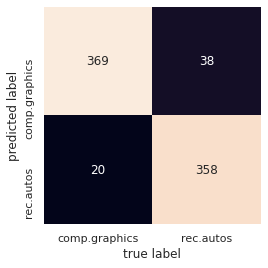

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

###Performance metrics

In [43]:
import sklearn
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

Accuracy: 0.9261146496815287
Precision: 0.9470899470899471
Recall: 0.9040404040404041
F1 Score: 0.9261001389375819
Mean Absolute Error: 0.07388535031847134
Mean Squared Error: 0.07388535031847134
Root Mean Squared Error: 0.2718185981835521


##**Random Forest Classifier - TF-IDF featurization**

###Bag-of-words featurization

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

###Training the model

In [45]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

###Confusion matrix

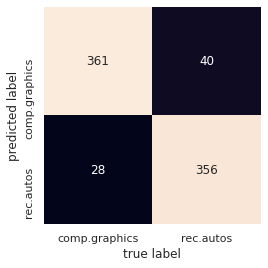

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

###Performance metrics

In [47]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

#This will be used for the bonus exercise
acurracy_row = []
precision_row = []
recall_row = []
f1_row = []
mean_abs_error = []
mean_sqrt_error = []
root_mean_sqrt_error = []

acurracy_row.append(sklearn.metrics.accuracy_score(test.target,labels))
precision_row.append(sklearn.metrics.precision_score(test.target,labels))
recall_row.append(sklearn.metrics.recall_score(test.target,labels))
f1_row.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
mean_abs_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))
root_mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))


Accuracy: 0.913375796178344
Precision: 0.9270833333333334
Recall: 0.898989898989899
F1 Score: 0.913372281726712
Mean Absolute Error: 0.08662420382165605
Mean Squared Error: 0.08662420382165605
Root Mean Squared Error: 0.2943199004852646


#**BONUS**

**Bonus (15 points): Using the code from Class 04. Write a function to find the best performing model for the TF-IDF vectorization. The requirements for this are:**


*   **Pass all metrics for each model in a single dataframe (each row has a metric value, each column is a model type).**
*   **Make the decision of the best model by counting which column has the highest F1-score and accuracy.**




**IMPORTANT NOTE: The metrics from the last exercise (Random Forest Classifier) is also considered for the BONUS exercise**

##**Multinomial Naive Bayes**


### TF-IDF featurization


Accuracy: 0.9477707006369427
Precision: 0.9118329466357309
Recall: 0.9924242424242424
F1 Score: 0.9476207603086282
Mean Absolute Error: 0.05222929936305733
Mean Squared Error: 0.05222929936305733
Root Mean Squared Error: 0.22853730409510245


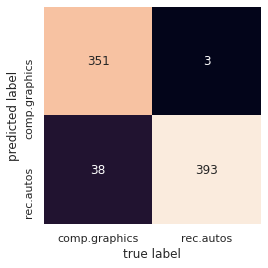

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

acurracy_row.append(sklearn.metrics.accuracy_score(test.target,labels))
precision_row.append(sklearn.metrics.precision_score(test.target,labels))
recall_row.append(sklearn.metrics.recall_score(test.target,labels))
f1_row.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
mean_abs_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))
root_mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))


##**Perceptron**

### TF-IDF featurization


Accuracy: 0.9490445859872612
Precision: 0.9299516908212561
Recall: 0.9722222222222222
F1 Score: 0.9489928525016245
Mean Absolute Error: 0.050955414012738856
Mean Squared Error: 0.050955414012738856
Root Mean Squared Error: 0.22573305919324013


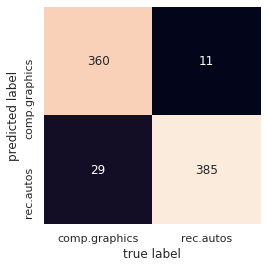

In [49]:
from sklearn.linear_model import Perceptron

model = make_pipeline(TfidfVectorizer(), Perceptron())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

acurracy_row.append(sklearn.metrics.accuracy_score(test.target,labels))
precision_row.append(sklearn.metrics.precision_score(test.target,labels))
recall_row.append(sklearn.metrics.recall_score(test.target,labels))
f1_row.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
mean_abs_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))
root_mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))

##**Logistic Regression**

### TF-IDF featurization

Accuracy: 0.954140127388535
Precision: 0.95
Recall: 0.9595959595959596
F1 Score: 0.9541311207198785
Mean Absolute Error: 0.045859872611464965
Mean Squared Error: 0.045859872611464965
Root Mean Squared Error: 0.2141491830744749


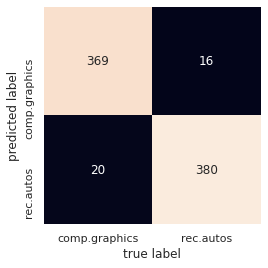

In [50]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

acurracy_row.append(sklearn.metrics.accuracy_score(test.target,labels))
precision_row.append(sklearn.metrics.precision_score(test.target,labels))
recall_row.append(sklearn.metrics.recall_score(test.target,labels))
f1_row.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
mean_abs_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))
root_mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))

##**Decision Tree**

### TF-IDF featurization

Accuracy: 0.8929936305732484
Precision: 0.90625
Recall: 0.8787878787878788
F1 Score: 0.8929892891918209
Mean Absolute Error: 0.1070063694267516
Mean Squared Error: 0.1070063694267516
Root Mean Squared Error: 0.3271182804839124


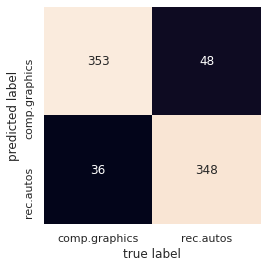

In [51]:
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

acurracy_row.append(sklearn.metrics.accuracy_score(test.target,labels))
precision_row.append(sklearn.metrics.precision_score(test.target,labels))
recall_row.append(sklearn.metrics.recall_score(test.target,labels))
f1_row.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
mean_abs_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))
root_mean_sqrt_error.append(sklearn.metrics.mean_squared_error(test.target,labels))

##**Determining the best performing model (for the TF-IDF vectorization)**

We pass all metrics for each model in a single dataframe (each row has a metric value, each column is a model type).


*   **Column 1:** Random Forest Classifier
*   **Column 2:** Naive Bayes
*   **Column 3:** Perceptron
*   **Column 4:** Logistic Regression
*   **Column 5:** Decision Tree





In [52]:
print(acurracy_row)
print(precision_row)
print(recall_row)
print(f1_row)
print(mean_abs_error)
print(mean_sqrt_error)
print(root_mean_sqrt_error)

[0.913375796178344, 0.9477707006369427, 0.9490445859872612, 0.954140127388535, 0.8929936305732484]
[0.9270833333333334, 0.9118329466357309, 0.9299516908212561, 0.95, 0.90625]
[0.898989898989899, 0.9924242424242424, 0.9722222222222222, 0.9595959595959596, 0.8787878787878788]
[0.913372281726712, 0.9476207603086282, 0.9489928525016245, 0.9541311207198785, 0.8929892891918209]
[0.08662420382165605, 0.05222929936305733, 0.050955414012738856, 0.045859872611464965, 0.1070063694267516]
[0.08662420382165605, 0.05222929936305733, 0.050955414012738856, 0.045859872611464965, 0.1070063694267516]
[0.08662420382165605, 0.05222929936305733, 0.050955414012738856, 0.045859872611464965, 0.1070063694267516]


In [54]:
import pandas as pd
df = pd.DataFrame(columns=['Random Forest','Naive Bayes','Perceptron','Logistic Regression','Decision Tree'])
df.loc['Acurracy'] = acurracy_row
df.loc['Precision'] = precision_row
df.loc['Recall'] = recall_row
df.loc['F1 Score'] = f1_row
df.loc['Mean Absolute Error'] = mean_abs_error
df.loc['Mean Squared Error'] = mean_sqrt_error
df.loc['Root Mean Squared Error'] = root_mean_sqrt_error
df

,Random Forest,Naive Bayes,Perceptron,Logistic Regression,Decision Tree
Acurracy,0.913376,0.947771,0.949045,0.954140,0.892994
Precision,0.927083,0.911833,0.929952,0.950000,0.906250
Recall,0.898990,0.992424,0.972222,0.959596,0.878788
F1 Score,0.913372,0.947621,0.948993,0.954131,0.892989
Mean Absolute Error,0.086624,0.052229,0.050955,0.045860,0.107006
Mean Squared Error,0.086624,0.052229,0.050955,0.045860,0.107006
Root Mean Squared Error,0.086624,0.052229,0.050955,0.045860,0.107006


After that a function is defined to determine which performing model is the best for the TF-IDF vectorization

In [56]:
#Function to determine which performing model for the TF-IDF vectorization is the best
#The return value is the column index (classifier) that has the best performance metrics
def get_best_performing_model(df):
  #Gets the number of columns (performing models)
  no_columns = len(df.columns)
  
  #Creates a new temporary row with the best score for each performing model (the mean of the f1 score and acurracy) 
  df.loc['Mean F1 Score/Acurracy'] = range(no_columns)
  for i in range(no_columns):
    #Gets the mean from the F1 Score and Acurracy for each model
    df.loc['Mean F1 Score/Acurracy'][i] = (df.loc['Acurracy'][i]+df.loc['F1 Score'][i])/2

  best_value = -1
  column_index = -1

  #Iteration process for each column to determine which model has the best F1 Score and Acurracy
  for i in range(no_columns):
    if df.loc['Mean F1 Score/Acurracy'][i] > df.loc['Mean F1 Score/Acurracy'][i-1]:
      best_value = df.loc['Mean F1 Score/Acurracy'][i]
      column_index = i

  return column_index

#Function that highlights the best performing model by coloring the cell
def style_specific_cell(x):

    color = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc['Mean F1 Score/Acurracy'][best_classifier_index] = color
    return df1

#Stores the index column of the best performing model
best_classifier_index = get_best_performing_model(df)

#Prints the result by showing the column name (performing model) using the index column which indicates the best performing model
print('\r\n\033[1mThe best performing model (considering the best F1 and Acurracy score) for the TF-IDF vectorization is: \033[0m'+df.columns[best_classifier_index]+' \r\n\r\n')
df.style.apply(style_specific_cell, axis=None)


The best performing model (considering the best F1 and Acurracy score) for the TF-IDF vectorization is: Logistic Regression 




,Random Forest,Naive Bayes,Perceptron,Logistic Regression,Decision Tree
Acurracy,0.913376,0.947771,0.949045,0.954140,0.892994
Precision,0.927083,0.911833,0.929952,0.950000,0.906250
Recall,0.898990,0.992424,0.972222,0.959596,0.878788
F1 Score,0.913372,0.947621,0.948993,0.954131,0.892989
Mean Absolute Error,0.086624,0.052229,0.050955,0.045860,0.107006
Mean Squared Error,0.086624,0.052229,0.050955,0.045860,0.107006
Root Mean Squared Error,0.086624,0.052229,0.050955,0.045860,0.107006
Mean F1 Score/Acurracy,0.913374,0.947696,0.949019,0.954136,0.892991
